In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
import math
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df

vidid  adview    views likes dislikes comment   published duration  \
0      VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1      VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2       VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3      VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4      VID_10175       1      666     1        0       0  2016-06-29    PT31S   
...          ...     ...      ...   ...      ...     ...         ...      ...   
14994     VID_31       2   525949  1137       83      86  2015-05-18  PT6M10S   
14995   VID_5861       1   665673  3849      156     569  2015-10-20  PT3M56S   
14996    VID_805       4     3479    16        1       1  2013-08-23  PT3M13S   
14997  VID_19843       1      963     0        0       0  2010-10-02    PT26S   
14998   VID_8534       1    15212    22        5       4  2016-02-19   PT1M1S   

      category  
0            F  
1            D  
2            C  
3            H  
4            D  
...        ...  
14994        A  
14995        D  
14996        B  
14997        G  
14998        D  

[14999 rows x 9 columns]

In [ ]:
df.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D

In [ ]:
df.shape

(14999, 9)

In [ ]:
#Checking the null columns
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
df.dtypes


vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [ ]:
df.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D

In [ ]:
#Checking for null values in the column of vid id
df[df.vidid.isnull()]

Empty DataFrame
Columns: [vidid, adview, views, likes, dislikes, comment, published, duration, category]
Index: []

In [ ]:
df.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D

In [ ]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df["category"]=df["category"].map(category)
df.head()

vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

   category  
0         6  
1         4  
2         3  
3         8  
4         4

In [ ]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [ ]:
df["views"]=pd.to_numeric(df["views"])
df["comment"]=pd.to_numeric(df["comment"])
df["likes"]=pd.to_numeric(df["likes"])
df["dislikes"]=pd.to_numeric(df["dislikes"])
df["adview"]=pd.to_numeric(df["adview"])

In [ ]:
column_vidid=df["vidid"]

In [ ]:
df['duration']=LabelEncoder().fit_transform(df['duration'])
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['published']=LabelEncoder().fit_transform(df['published'])

In [ ]:
df.head()

vidid  adview    views  likes  dislikes  comment  published  duration  \
0   5912      40  1031602   8523       363     1095       2168      2925   
1   2741       2     1707     56         2        6       2185      3040   
2   8138       1     2023     25         0        2       2094      1863   
3   9005       6   620860    777       161      153       2119      2546   
4    122       1      666      1         0        0       2091      1963   

   category  
0         6  
1         4  
2         3  
3         8  
4         4

In [ ]:
import time

In [ ]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv('/content/drive/MyDrive/train.csv')["duration"]
time = mp.apply(checki)

In [ ]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
time1=time.apply(func_sec)

In [ ]:
df["duration"]=time1
df.head()

vidid  adview    views  likes  dislikes  comment  published  duration  \
0   5912      40  1031602   8523       363     1095       2168       457   
1   2741       2     1707     56         2        6       2185       570   
2   8138       1     2023     25         0        2       2094       136   
3   9005       6   620860    777       161      153       2119       262   
4    122       1      666      1         0        0       2091        31   

   category  
0         6  
1         4  
2         3  
3         8  
4         4

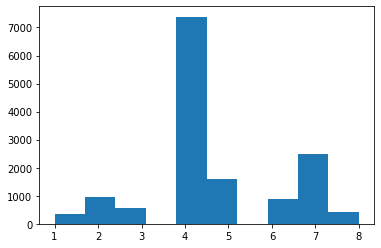

In [ ]:
#visualisation
plt.hist(df["category"])
plt.show()

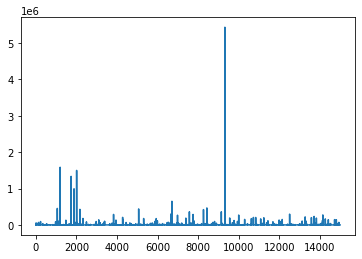

In [ ]:
plt.plot(df["adview"])
plt.show()

In [ ]:
df=df[df["adview"]<2000000]

In [ ]:
import seaborn as sns

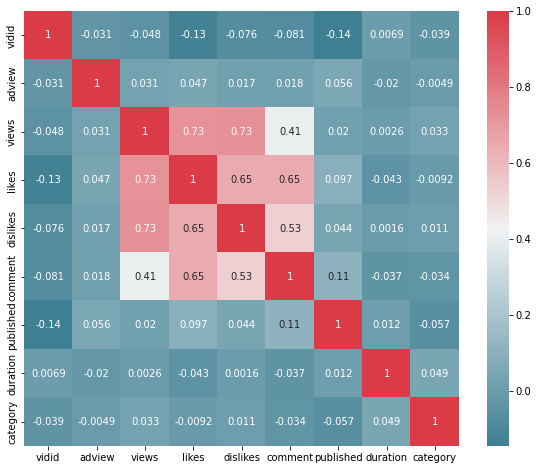

In [ ]:
f, ax=plt.subplots(figsize=(10, 8))
corr=df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True, ax=ax,annot=True)

In [ ]:
Y_train=pd.DataFrame(data=df.iloc[:,1].values, columns=['targets'])
df=df.drop(["adview"],axis=1)
df=df.drop(["vidid"],axis=1)
df.head()

views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         6
1     1707     56         2        6       2185       570         4
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         8
4      666      1         0        0       2091        31         4

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df,Y_train,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(11708, 7)

In [ ]:
X_train

views  likes  dislikes  comment  published  duration  category
13440    86739    117         9        4       1217       180         4
9523   1419766    887       362      232       1547      5811         7
3012     26086     19         0        9        966       178         6
1888    305445   3662        45      555       1484       257         7
11378   737649   1702        96       53       1127       895         4
...        ...    ...       ...      ...        ...       ...       ...
5316     31648    140        24       14       1925       231         7
13748     1804      4         1        0       1049       232         4
5522    204817     86        35       11       1237       218         4
883    1361366   1384       757      185       2145       240         7
7445     39758    122         6        3        224       354         4

[11708 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train.mean()

0.1739096800320488

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import linear_model

In [ ]:
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_regression.predict(X_test)

array([[-1041.40299121],
       [ 2737.25119825],
       [  393.4111476 ],
       ...,
       [ -945.54652298],
       [ 2944.53211924],
       [-1497.73414422]])

In [ ]:
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2691.4955601092897
Mean Squared Error: 892272455.6390027
Root Mean Squared Error: 29870.929942654995


In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 3328.667271672222
Mean Squared Error: 618540826.7901529
Root Mean Squared Error: 24870.48103254444


In [ ]:
import tensorflow as tf 

In [ ]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),
                               Dense(6,activation="relu"),Dense(1)])
optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=100)


Epoch 1/100
366/366 [==============================] - 2s 3ms/step - loss: 767406208.0000 - mean_squared_error: 767406208.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767401280.0000 - mean_squared_error: 767401280.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767390592.0000 - mean_squared_error: 767390592.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767372224.0000 - mean_squared_error: 767372224.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767344768.0000 - mean_squared_error: 767344768.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767303552.0000 - mean_squared_error: 767303552.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767249344.0000 - mean_squared_error: 767249344.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767185408.0000 - mean_squared_error:

In [ ]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 48        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print_error(X_test,y_test,ann)

Mean Absolute Error: 3137.2752120727723
Mean Squared Error: 828827975.1564476
Root Mean Squared Error: 28789.37260789904


In [ ]:
import joblib
joblib.dump(random_forest, "randomforest_youtubeadview.pkl")

['randomforest_youtubeadview.pkl']

In [ ]:
ann.save("ann_ytubeadview.h5")

# Model Test

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/test.csv')
dt

vidid    views likes dislikes comment   published    duration  \
0      VID_1054   440238  6153      218    1377  2017-02-18     PT7M29S   
1     VID_18629  1040132  8171      340    1047  2016-06-28     PT6M29S   
2     VID_13967    28534    31       11       1  2014-03-10    PT37M54S   
3     VID_19442  1316715  2284      250     274  2010-06-05     PT9M55S   
4       VID_770  1893173  2519      225     116  2016-09-03      PT3M8S   
...         ...      ...   ...      ...     ...         ...         ...   
8759   VID_2944   111205   471       14     101  2011-04-19     PT3M14S   
8760   VID_8195  1074457  1024      195      65  2016-06-03  PT2H18M35S   
8761  VID_18973  1891692  4606     1109     191  2016-06-26     PT7M14S   
8762   VID_5849   714859  1639      151     382  2016-03-23     PT3M15S   
8763   VID_8494     5297    12        1       0  2016-12-19    PT10M14S   

     category  
0           B  
1           F  
2           D  
3           G  
4           B  
...       ...  
8759        C  
8760        D  
8761        F  
8762        D  
8763        D  

[8764 rows x 8 columns]

In [ ]:
dt.head()

vidid    views likes dislikes comment   published  duration category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S        B
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S        F
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S        D
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S        G
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S        B

In [ ]:
dt.isnull().sum()

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
dt.dtypes

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [ ]:
dt[dt.vidid.isnull()]

Empty DataFrame
Columns: [vidid, views, likes, dislikes, comment, published, duration, category]
Index: []

In [ ]:
from keras.models import load_model
model = load_model("/content/ann_ytubeadview.h5")

In [ ]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dt["category"]=dt["category"].map(category)
dt.head()

vidid    views likes dislikes comment   published  duration  category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S         2
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S         6
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S         4
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S         7
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S         2

In [ ]:
dt=dt[dt.views!='F']
dt=dt[dt.likes!='F']
dt=dt[dt.dislikes!='F']
dt=dt[dt.comment!='F']

In [ ]:
dt.head()

vidid    views likes dislikes comment   published  duration  category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S         2
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S         6
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S         4
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S         7
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S         2

In [ ]:
dt["views"] = pd.to_numeric(dt["views"])
dt["comment"] = pd.to_numeric(dt["comment"])
dt["likes"] = pd.to_numeric(dt["likes"])
dt["dislikes"] = pd.to_numeric(dt["dislikes"])
column_vidid=dt['vidid']

In [ ]:
dt.head()

vidid    views  likes  dislikes  comment   published  duration  \
0   VID_1054   440238   6153       218     1377  2017-02-18   PT7M29S   
1  VID_18629  1040132   8171       340     1047  2016-06-28   PT6M29S   
2  VID_13967    28534     31        11        1  2014-03-10  PT37M54S   
3  VID_19442  1316715   2284       250      274  2010-06-05   PT9M55S   
4    VID_770  1893173   2519       225      116  2016-09-03    PT3M8S   

   category  
0         2  
1         6  
2         4  
3         7  
4         2

In [ ]:
dt['duration']=LabelEncoder().fit_transform(dt['duration'])
dt['vidid']=LabelEncoder().fit_transform(dt['vidid'])
dt['published']=LabelEncoder().fit_transform(dt['published'])
dt.head()

vidid    views  likes  dislikes  comment  published  duration  category
0    231   440238   6153       218     1377       2053      2115         2
1   3444  1040132   8171       340     1047       1825      2055         6
2   1593    28534     31        11        1       1009      1506         4
3   3775  1316715   2284       250      274        116      2265         7
4   7644  1893173   2519       225      116       1892      1625         2

In [ ]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv('/content/drive/MyDrive/test.csv')["duration"]
time = mp.apply(checki)

In [ ]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

dt["duration"]=time1
dt.head()

vidid    views  likes  dislikes  comment  published  duration  category
0    231   440238   6153       218     1377       2053       449         2
1   3444  1040132   8171       340     1047       1825       389         6
2   1593    28534     31        11        1       1009      2274         4
3   3775  1316715   2284       250      274        116       595         7
4   7644  1893173   2519       225      116       1892       188         2

In [ ]:
dt=dt.drop(["vidid"],axis=1)
dt.head()

views  likes  dislikes  comment  published  duration  category
0   440238   6153       218     1377       2053       449         2
1  1040132   8171       340     1047       1825       389         6
2    28534     31        11        1       1009      2274         4
3  1316715   2284       250      274        116       595         7
4  1893173   2519       225      116       1892       188         2

In [ ]:
scaler = MinMaxScaler()
X_test = dt
X_test=scaler.fit_transform(X_test)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [ ]:
prediction = prediction.rename(columns={0: "Adview"})

In [ ]:
prediction.head()

Adview
0  2428.467041
1  2458.786621
2   822.936340
3   406.855255
4  2298.568359

In [ ]:
prediction.to_csv('predictions.csv')